In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras.models import load_model, Model
import numpy as np

print("TensorFlow version is: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version is: {}".format(tf.keras.__version__))

TensorFlow version is: 2.9.1
Eager execution is: True
Keras version is: 2.9.0


In [2]:
site_od_detector = load_model('checkpoints/Site_OD_Output.h5')

2022-11-30 16:06:38.475227: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-30 16:06:38.475333: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: isaac-Lenovo-Legion-Y740-15IRHg
2022-11-30 16:06:38.475360: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: isaac-Lenovo-Legion-Y740-15IRHg
2022-11-30 16:06:38.475595: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-11-30 16:06:38.475684: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-11-30 16:06:38.475705: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-11-30 16:06:38.476267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (one

In [3]:
site_od_detector.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 448, 448, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 448, 448, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 448, 448, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 224, 224, 64  0          ['tf.math.multiply_3[0][0]',     
 da)                            )                                 'tf.math.multiply_5[0][0]']     
                                                                                                  
 conv2d_6 (Conv2D)              (None, 224, 224, 64  4096        ['tf.__operators__.add[0][0]']   
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 224, 224, 64  4096        ['tf.math.multiply_1[0][0]']     
                                )                                                                 
                                                                                                  
 batch_nor

 a)                             )                                 'tf.math.tanh_10[0][0]']        
                                                                                                  
 conv2d_11 (Conv2D)             (None, 112, 112, 64  4096        ['tf.math.multiply_10[0][0]']    
                                )                                                                 
                                                                                                  
 batch_normalization_11 (BatchN  (None, 112, 112, 64  256        ['conv2d_11[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 tf.math.softplus_11 (TFOpLambd  (None, 112, 112, 64  0          ['batch_normalization_11[0][0]'] 
 a)                             )                                                                 
          

 tf.math.softplus_9 (TFOpLambda  (None, 112, 112, 64  0          ['batch_normalization_9[0][0]']  
 )                              )                                                                 
                                                                                                  
 tf.math.tanh_15 (TFOpLambda)   (None, 112, 112, 64  0           ['tf.math.softplus_15[0][0]']    
                                )                                                                 
                                                                                                  
 tf.math.tanh_9 (TFOpLambda)    (None, 112, 112, 64  0           ['tf.math.softplus_9[0][0]']     
                                )                                                                 
                                                                                                  
 tf.math.multiply_15 (TFOpLambd  (None, 112, 112, 64  0          ['batch_normalization_15[0][0]', 
 a)       

 tf.math.tanh_21 (TFOpLambda)   (None, 56, 56, 128)  0           ['tf.math.softplus_21[0][0]']    
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_21[0][0]', 
 a)                                                               'tf.math.tanh_21[0][0]']        
                                                                                                  
 tf.__operators__.add_3 (TFOpLa  (None, 56, 56, 128)  0          ['tf.math.multiply_19[0][0]',    
 mbda)                                                            'tf.math.multiply_21[0][0]']    
                                                                                                  
 conv2d_22 (Conv2D)             (None, 56, 56, 128)  16384       ['tf.__operators__.add_3[0][0]'] 
                                                                                                  
 batch_nor

                                                                                                  
 tf.math.softplus_27 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_27[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_27 (TFOpLambda)   (None, 56, 56, 128)  0           ['tf.math.softplus_27[0][0]']    
                                                                                                  
 tf.math.multiply_27 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_27[0][0]', 
 a)                                                               'tf.math.tanh_27[0][0]']        
                                                                                                  
 tf.__operators__.add_6 (TFOpLa  (None, 56, 56, 128)  0          ['tf.__operators__.add_5[0][0]', 
 mbda)    

 conv2d_33 (Conv2D)             (None, 56, 56, 128)  147456      ['tf.math.multiply_32[0][0]']    
                                                                                                  
 batch_normalization_33 (BatchN  (None, 56, 56, 128)  512        ['conv2d_33[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.math.softplus_33 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_33[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_33 (TFOpLambda)   (None, 56, 56, 128)  0           ['tf.math.softplus_33[0][0]']    
                                                                                                  
 tf.math.m

                                                                                                  
 tf.math.multiply_37 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_37[0][0]', 
 a)                                                               'tf.math.tanh_37[0][0]']        
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 57, 57, 256)  0          ['tf.math.multiply_37[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2d_38 (Conv2D)             (None, 28, 28, 512)  1179648     ['zero_padding2d_3[0][0]']       
                                                                                                  
 batch_normalization_38 (BatchN  (None, 28, 28, 512)  2048       ['conv2d_38[0][0]']              
 ormalizat

 tf.math.tanh_44 (TFOpLambda)   (None, 28, 28, 256)  0           ['tf.math.softplus_44[0][0]']    
                                                                                                  
 tf.math.multiply_44 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_44[0][0]', 
 a)                                                               'tf.math.tanh_44[0][0]']        
                                                                                                  
 tf.__operators__.add_12 (TFOpL  (None, 28, 28, 256)  0          ['tf.__operators__.add_11[0][0]',
 ambda)                                                           'tf.math.multiply_44[0][0]']    
                                                                                                  
 conv2d_45 (Conv2D)             (None, 28, 28, 256)  65536       ['tf.__operators__.add_12[0][0]']
                                                                                                  
 batch_nor

                                                                                                  
 tf.math.softplus_50 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_50[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_50 (TFOpLambda)   (None, 28, 28, 256)  0           ['tf.math.softplus_50[0][0]']    
                                                                                                  
 tf.math.multiply_50 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_50[0][0]', 
 a)                                                               'tf.math.tanh_50[0][0]']        
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 28, 28, 256)  0          ['tf.__operators__.add_14[0][0]',
 ambda)   

 conv2d_56 (Conv2D)             (None, 28, 28, 256)  589824      ['tf.math.multiply_55[0][0]']    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 28, 28, 256)  1024       ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.math.softplus_56 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_56[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_56 (TFOpLambda)   (None, 28, 28, 256)  0           ['tf.math.softplus_56[0][0]']    
                                                                                                  
 tf.math.m

                                                                                                  
 tf.math.tanh_61 (TFOpLambda)   (None, 14, 14, 512)  0           ['tf.math.softplus_61[0][0]']    
                                                                                                  
 tf.math.multiply_61 (TFOpLambd  (None, 14, 14, 512)  0          ['batch_normalization_61[0][0]', 
 a)                                                               'tf.math.tanh_61[0][0]']        
                                                                                                  
 conv2d_62 (Conv2D)             (None, 14, 14, 512)  262144      ['tf.math.multiply_61[0][0]']    
                                                                                                  
 batch_normalization_62 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_62[0][0]']              
 ormalization)                                                                                    
          

 a)                                                                                               
                                                                                                  
 tf.math.tanh_67 (TFOpLambda)   (None, 14, 14, 512)  0           ['tf.math.softplus_67[0][0]']    
                                                                                                  
 tf.math.multiply_67 (TFOpLambd  (None, 14, 14, 512)  0          ['batch_normalization_67[0][0]', 
 a)                                                               'tf.math.tanh_67[0][0]']        
                                                                                                  
 tf.__operators__.add_21 (TFOpL  (None, 14, 14, 512)  0          ['tf.__operators__.add_20[0][0]',
 ambda)                                                           'tf.math.multiply_67[0][0]']    
                                                                                                  
 conv2d_68

 conv2d_72 (Conv2D)             (None, 14, 14, 512)  524288      ['tf.math.multiply_71[0][0]']    
                                                                                                  
 batch_normalization_72 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu (TFOpLambda)  (None, 14, 14, 512)  0           ['batch_normalization_72[0][0]'] 
                                                                                                  
 conv2d_73 (Conv2D)             (None, 14, 14, 1024  4718592     ['tf.nn.leaky_relu[0][0]']       
                                )                                                                 
                                                                                                  
 batch_nor

 conv2d_79 (Conv2D)             (None, 28, 28, 256)  131072      ['tf.concat_6[0][0]']            
                                                                                                  
 batch_normalization_79 (BatchN  (None, 28, 28, 256)  1024       ['conv2d_79[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu_8 (TFOpLambda  (None, 28, 28, 256)  0          ['batch_normalization_79[0][0]'] 
 )                                                                                                
                                                                                                  
 conv2d_80 (Conv2D)             (None, 28, 28, 512)  1179648     ['tf.nn.leaky_relu_8[0][0]']     
                                                                                                  
 batch_nor

 a)                                                                                               
                                                                                                  
 conv2d_89 (Conv2D)             (None, 56, 56, 256)  294912      ['tf.nn.leaky_relu_17[0][0]']    
                                                                                                  
 batch_normalization_89 (BatchN  (None, 56, 56, 256)  1024       ['conv2d_89[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu_18 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_89[0][0]'] 
 a)                                                                                               
                                                                                                  
 end_neck_

 tf.concat_9 (TFOpLambda)       (None, 14, 14, 1024  0           ['tf.nn.leaky_relu_26[0][0]',    
                                )                                 'tf.nn.leaky_relu_5[0][0]']     
                                                                                                  
 conv2d_96 (Conv2D)             (None, 14, 14, 512)  524288      ['tf.concat_9[0][0]']            
                                                                                                  
 batch_normalization_96 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_96[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu_27 (TFOpLambd  (None, 14, 14, 512)  0          ['batch_normalization_96[0][0]'] 
 a)                                                                                               
          

                                                                                                  
 tf.nn.leaky_relu_40 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_108[0][0]']
 a)                                                                                               
                                                                                                  
 tf.nn.leaky_relu_52 (TFOpLambd  (None, 14, 14, 256)  0          ['batch_normalization_120[0][0]']
 a)                                                                                               
                                                                                                  
 tf.nn.leaky_relu_48 (TFOpLambd  (None, 14, 14, 256)  0          ['batch_normalization_116[0][0]']
 a)                                                                                               
                                                                                                  
 conv2d_10

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_118 (Batch  (None, 14, 14, 256)  1024       ['conv2d_124[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 tf.nn.leaky_relu_38 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_106[0][0]']
 a)                                                                                               
                                                                                                  
 tf.nn.leaky_relu_34 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_102[0][0]']
 a)                                                                                               
          

 conv2d_130 (Conv2D)            (None, 14, 14, 12)   3084        ['tf.nn.leaky_relu_54[0][0]']    
                                                                                                  
 conv2d_132 (Conv2D)            (None, 14, 14, 3)    771         ['tf.nn.leaky_relu_55[0][0]']    
                                                                                                  
 conv2d_126 (Conv2D)            (None, 14, 14, 36)   9252        ['tf.nn.leaky_relu_51[0][0]']    
                                                                                                  
 sbbox (Concatenate)            (None, 56, 56, 51)   0           ['conv2d_108[0][0]',             
                                                                  'conv2d_110[0][0]',             
                                                                  'conv2d_104[0][0]']             
                                                                                                  
 mbbox (Co

                                                                                                  
 tf.math.multiply_72 (TFOpLambd  (None, 56, 56, 3, 2  0          ['tf.math.sigmoid[0][0]']        
 a)                             )                                                                 
                                                                                                  
 tf.tile (TFOpLambda)           (None, 56, 56, 3, 2  0           ['tf.__operators__.getitem[0][0]'
                                )                                ]                                
                                                                                                  
 tf.math.multiply_76 (TFOpLambd  (None, 28, 28, 3, 2  0          ['tf.math.sigmoid_3[0][0]']      
 a)                             )                                                                 
                                                                                                  
 tf.tile_1

 a)                             )                                                                 
                                                                                                  
 tf.math.multiply_74 (TFOpLambd  (None, 56, 56, 3, 2  0          ['tf.math.exp[0][0]']            
 a)                             )                                                                 
                                                                                                  
 tf.math.multiply_77 (TFOpLambd  (None, 28, 28, 3, 2  0          ['tf.__operators__.add_24[0][0]']
 a)                             )                                                                 
                                                                                                  
 tf.math.multiply_78 (TFOpLambd  (None, 28, 28, 3, 2  0          ['tf.math.exp_1[0][0]']          
 a)                             )                                                                 
          

 da)                                                                                              
                                                                                                  
 tf.compat.v1.shape_6 (TFOpLamb  (2,)                0           ['tf.compat.v1.boolean_mask_1[0][
 da)                                                             0]']                             
                                                                                                  
 tf.reshape_9 (TFOpLambda)      (None, None, 4)      0           ['tf.compat.v1.boolean_mask[0][0]
                                                                 ',                               
                                                                  'tf.__operators__.getitem_3[0][0
                                                                 ]',                              
                                                                  'tf.__operators__.getitem_4[0][0
          

In [5]:
def read_labels(labels_path):
    with open(labels_path) as f:
        labels = f.readlines()
    labels = [c.strip() for c in labels]
    return labels

labels = read_labels('data/classes/site_od_classes.txt')
labels

['barrier',
 'barrier_angle',
 'barrier_connector',
 'barrier_pad',
 'cone',
 'excavator',
 'excavator_nwl',
 'fire_extinguisher',
 'forklift',
 'ladder',
 'manhole',
 'water_barrier']

In [6]:
import colorsys
import random
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from skimage.transform import resize as imresize

def generate_colors(class_names):
    hsv_tuples = [(x / len(class_names), 1., 1.) for x in range(len(class_names))]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] ), int(x[1] ), int(x[2] )), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors


def resize(image, target_size):
    ih, iw = target_size[:2]
    h, w = image.shape[:2]
    scale = min(iw / w, ih / h)
    nw, nh = int(scale * w), int(scale * h)
    image_resized = imresize(image, (nh, nw), preserve_range=True, mode='constant', anti_aliasing=True)

    output_image = np.full(shape=[ih, iw, 3], fill_value=128.0)
    if len(image.shape) == 2:
        output_image = output_image[..., 0]
    dw, dh = (iw - nw) // 2, (ih - nh) // 2
    output_image[dh:nh + dh, dw:nw + dw, ...] = image_resized
    return output_image
        
# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    #image = resize(img_to_array(image), shape)
    image = img_to_array(load_img(filename, interpolation = 'bilinear', target_size=shape))
    
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0

    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    
    return image, width, height

In [12]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
    

def draw_preds_bbs(file_name, preds_pipeline, labels, is_coreml = False):
    boxes, pred_conf = tf.convert_to_tensor(preds_pipeline[..., :4]), tf.convert_to_tensor(preds_pipeline[..., 4:])

    #boxes = tf.concat([boxes[..., :2], boxes[..., 3:4], boxes[..., 2:3]], axis=-1)
    boxes = tf.concat(
        [
            boxes[..., :2] - boxes[..., 2:] * 0.5,
            boxes[..., :2] + boxes[..., 2:] * 0.5,
        ],
        axis=-1,
    )
    boxes, scores, classes, valid_detections = tf.image.combined_non_max_suppression(
            boxes=tf.reshape(boxes, (tf.shape(boxes)[0], -1, 1, 4)),
            scores=tf.reshape(pred_conf, (tf.shape(pred_conf)[0], -1, tf.shape(pred_conf)[-1])),
            max_output_size_per_class=50,
            max_total_size=50,
            iou_threshold=0.6,
            score_threshold=0.4
        )
    
    data = pyplot.imread(file_name)
    h, w = data.shape[:2]
    
    # Get top corner and WH from top and bottom corners
    boxes = boxes.numpy()
    boxes = np.concatenate(
        [
            boxes[..., :2],
            (boxes[..., 2:] - boxes[..., :2]),
        ],
        axis=-1,
    )

    print('start drawing boxes')
    ax = pyplot.gca()
    colors = generate_colors(labels)
    for i in range(valid_detections[0].numpy()):
        index = i
        box = boxes[0, i, ...] * np.array([w, h, w, h])
        class_id = int(classes[0, i].numpy())
        score = scores[0, i].numpy()
        
        rect = Rectangle((box[0], box[1]), box[2], box[3], fill=False, color=colors[class_id])
        ax.add_patch(rect)
        label = "%s (%.3f)" % (labels[class_id], score*100)
        pyplot.text(
            box[0],
            box[1],
            label, 
            color= 'white'
        )
    pyplot.imshow(data)
    pyplot.show()

In [9]:
# Pre-process the image
input_w, input_h = site_od_detector.input.shape[1], site_od_detector.input.shape[2]#608, 608
photo_filename = 'sample_test_images/1.png'
# photo_filename = 'empty_image.jpg'
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
print("image initial size: ", image_w, image_h)
print("input image",image.shape)

image initial size:  1430 960
input image (1, 448, 448, 3)


1/1 [==============================] - 0s 437ms/step
start drawing boxes


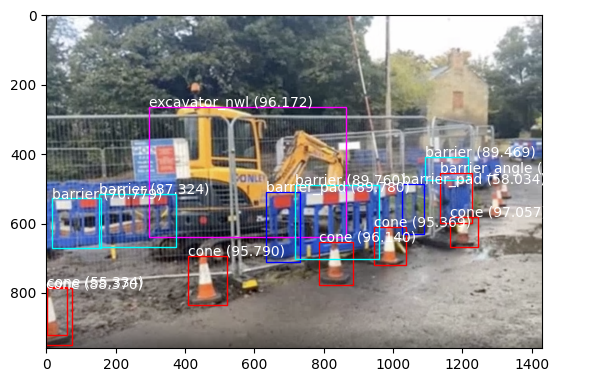

In [13]:
ytinyhat = site_od_detector.predict(image)
draw_preds_bbs(photo_filename, ytinyhat, labels)